In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# import formula api as alias smf
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt

df_loans = pd.read_csv('loansData_clean.csv')

df_loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [66]:
df_loans['annual_inc'] = df_loans['Monthly.Income'].map(lambda val: val*12)
df_loans.tail()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,annual_inc
2495,30000,29950.00,0.1677,60,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15,45880,1,8 years,705,111000.00
2496,16000,16000.00,0.1409,60,home_improvement,21.54%,MD,OWN,8903.25,740-744,18,18898,1,10+ years,740,106839.00
2497,10000,10000.00,0.1399,36,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4,4544,0,10+ years,680,26000.04
2498,6000,6000.00,0.1242,36,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8,7753,0,5 years,675,42000.00
2499,9000,5242.75,0.1379,36,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7,7589,0,10+ years,670,46500.00


In [67]:
df_loans.shape

(2500, 16)

In [68]:
df_loans['int_rate'] = df_loans['Interest.Rate']

# import formula api as alias smf
import statsmodels.formula.api as smf

# a utility function to only show the coeff section of summary
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# formula: response ~ predictor + predictor
est = smf.ols(formula='int_rate ~ annual_inc', data=df_loans).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.1300,0.001,88.868,0.000,0.127 0.133
annual_inc,1.078e-08,1.76e-08,0.614,0.540,-2.37e-08 4.53e-08


AttributeError: 'DataFrame' object has no attribute 'design_info'

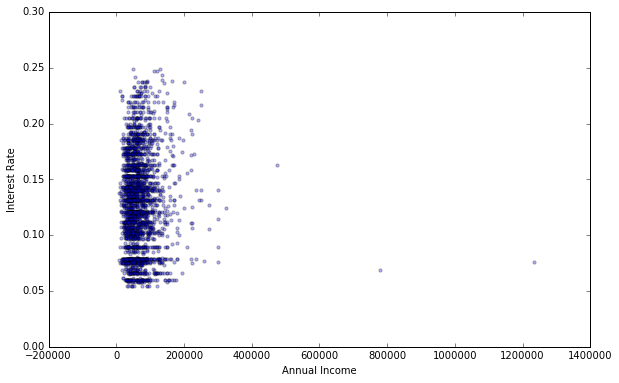

In [69]:
# plot Interest.Rate against Annual.Income
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df_loans.annual_inc, df_loans.int_rate, s=10, alpha=0.3)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')

from statsmodels.api import add_constant 

# test2 = model.predict(add_constant(df[["B", "C"]]), transform=False)

# points linearlyd space on lstats
x = pd.DataFrame({'annual_inc': np.linspace(df_loans.annual_inc.min(), df_loans.annual_inc.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='int_rate ~ 1 + annual_inc', data=df_loans).fit()
# poly_l.predict(x.annual_inc.values)
poly_1.predict(add_constant(x))
# plt.plot(x.annual_inc, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
#          alpha=0.9)


# plt.scatter(df_loans.annual_inc, df_loans.int_rate, alpha=0.3)
# plt.xlabel('Annual Income')
# plt.ylabel('Interest Rate')

# annual_inc_linspace = np.linspace(df_loans.annual_inc.min(), df_loans.annual_inc.max(), 100)

# plt.plot(annual_inc_linspace, est.params[0] + est.params[1] * annual_inc_linspace, 'r')

In [71]:
df_loans['home_ownership'] = df_loans['Home.Ownership']
X = df_loans.copy()
y = X.pop('int_rate')

#compute average interest rate for home ownership... I think
y.groupby(X.home_ownership).mean()

home_ownership
MORTGAGE    0.127411
NONE        0.074300
OTHER       0.160380
OWN         0.129060
RENT        0.134135
Name: int_rate, dtype: float64

In [72]:
df_loans['home_ownership_cat'] = pd.Categorical(df_loans.home_ownership).codes
df_loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,annual_inc,int_rate,home_ownership,home_ownership_cat
0,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735,78500.04,0.0890,MORTGAGE,0
1,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715,54999.96,0.1212,MORTGAGE,0
2,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690,138000.00,0.2198,MORTGAGE,0
3,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695,45999.96,0.0999,MORTGAGE,0
4,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695,38340.00,0.1171,RENT,4


In [73]:
est = smf.ols(formula="int_rate ~ annual_inc + home_ownership_cat", data=df_loans).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.1253,0.002,66.762,0.000,0.122 0.129
annual_inc,2.617e-08,1.79e-08,1.458,0.145,-9.02e-09 6.14e-08
home_ownership_cat,0.0018,0.000,3.973,0.000,0.001 0.003


In [82]:
# a utility function to only show the coeff section of summary
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

est = smf.ols(formula="int_rate ~ annual_inc + C(home_ownership) + annual_inc * C(home_ownership)", data=df_loans).fit()
# est = smf.ols(formula="int_rate ~ annual_inc + C(home_ownership) + annual_inc * C(home_ownership)", data=df_loans).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.1267,0.002,61.200,0.000,0.123 0.131
C(home_ownership)[T.NONE],-2.271e-12,1.7e-13,-13.366,0.000,-2.6e-12 -1.94e-12
C(home_ownership)[T.OTHER],-0.0183,0.084,-0.217,0.828,-0.184 0.147
C(home_ownership)[T.OWN],0.0031,0.006,0.518,0.605,-0.009 0.015
C(home_ownership)[T.RENT],0.0021,0.003,0.639,0.523,-0.004 0.009
annual_inc,8.725e-09,2.09e-08,0.417,0.677,-3.24e-08 4.98e-08
annual_inc:C(home_ownership)[T.NONE],9.171e-19,4.15e-18,0.221,0.825,-7.22e-18 9.06e-18
annual_inc:C(home_ownership)[T.OTHER],7.694e-07,1.23e-06,0.625,0.532,-1.64e-06 3.18e-06
annual_inc:C(home_ownership)[T.OWN],-2.108e-08,8.41e-08,-0.251,0.802,-1.86e-07 1.44e-07
annual_inc:C(home_ownership)[T.RENT],8.133e-08,4.39e-08,1.853,0.064,-4.73e-09 1.67e-07


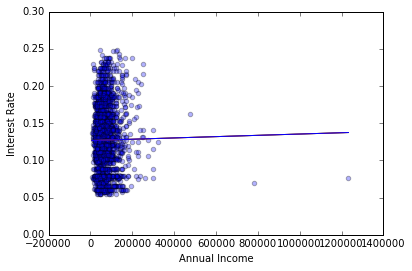

In [93]:
df_loans['home_own_TF'] = df_loans['home_ownership'].map(lambda val: 1 if val == 'OWN' else 0)

plt.scatter(df_loans.annual_inc, df_loans.int_rate, alpha=0.3)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')

annual_inc_linspace = np.linspace(df_loans.annual_inc.min(), df_loans.annual_inc.max(), 100)

plt.plot(annual_inc_linspace, est.params[0] + est.params[5] * annual_inc_linspace, 'g')

plt.plot(annual_inc_linspace, est.params[0] + est.params[5] * annual_inc_linspace + est.params[1]*1, 'r')
plt.plot(annual_inc_linspace, est.params[0] + est.params[5] * annual_inc_linspace + est.params[1]*1 + est.params[6] * annual_inc_linspace * 1, 'b')


         
